
Model: Random Forest Baseline
Accuracy: 0.6757
F1 Score: 0.6708
Confusion Matrix:
[[197  42  38]
 [ 50  44  65]
 [ 38  54 357]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.71      0.70       277
           1       0.31      0.28      0.29       159
           2       0.78      0.80      0.79       449

    accuracy                           0.68       885
   macro avg       0.59      0.59      0.59       885
weighted avg       0.67      0.68      0.67       885


Model: Logistic Regression Baseline
Accuracy: 0.7186
F1 Score: 0.6542
Confusion Matrix:
[[204   3  70]
 [ 54   5 100]
 [ 22   0 427]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.74      0.73       277
           1       0.62      0.03      0.06       159
           2       0.72      0.95      0.82       449

    accuracy                           0.72       885
   macro avg       0.69      0.57    

[I 2025-02-16 20:22:06,316] A new study created in memory with name: no-name-05dca212-31e4-4664-85cd-9dbe06b31cc1
<ipython-input-10-fc13347f7ff3>:95: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  model = GaussianNB(var_smoothing=trial.suggest_loguniform("var_smoothing", 1e-9, 1e-1))
[I 2025-02-16 20:22:06,330] Trial 0 finished with value: 0.6513591177369844 and parameters: {'model': 'Naïve Bayes', 'var_smoothing': 0.0005681407342366154}. Best is trial 0 with value: 0.6513591177369844.



Model: SVM Baseline
Accuracy: 0.7186
F1 Score: 0.6901
Confusion Matrix:
[[171  45  61]
 [ 28  33  98]
 [ 11   6 432]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.62      0.70       277
           1       0.39      0.21      0.27       159
           2       0.73      0.96      0.83       449

    accuracy                           0.72       885
   macro avg       0.65      0.60      0.60       885
weighted avg       0.70      0.72      0.69       885


Model: Naïve Bayes Baseline
Accuracy: 0.6915
F1 Score: 0.6506
Confusion Matrix:
[[186  15  76]
 [ 40  16 103]
 [ 21  18 410]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.67      0.71       277
           1       0.33      0.10      0.15       159
           2       0.70      0.91      0.79       449

    accuracy                           0.69       885
   macro avg       0.59      0.56      0.55       885
w

[I 2025-02-16 20:22:08,305] Trial 1 finished with value: 0.6720496356920753 and parameters: {'model': 'Random Forest', 'n_estimators': 151, 'max_depth': 20}. Best is trial 1 with value: 0.6720496356920753.
<ipython-input-10-fc13347f7ff3>:84: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C=trial.suggest_loguniform("C", 1e-3, 1e3),
[I 2025-02-16 20:22:08,407] Trial 2 finished with value: 0.6276609313637601 and parameters: {'model': 'Logistic Regression', 'C': 0.07736285647012243}. Best is trial 1 with value: 0.6720496356920753.
<ipython-input-10-fc13347f7ff3>:90: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C=trial.suggest_loguniform("C", 1e-3, 1e3),
[I 2025-02-16 20:22:

Best parameters: {'model': 'Random Forest', 'n_estimators': 167, 'max_depth': 7}

Model: Random Forest Optimized
Accuracy: 0.7243
F1 Score: 0.7083
Confusion Matrix:
[[201  30  46]
 [ 49  42  68]
 [ 18  33 398]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.73      0.74       277
           1       0.40      0.26      0.32       159
           2       0.78      0.89      0.83       449

    accuracy                           0.72       885
   macro avg       0.64      0.63      0.63       885
weighted avg       0.70      0.72      0.71       885


Model: Logistic Regression Optimized
Accuracy: 0.7186
F1 Score: 0.6542
Confusion Matrix:
[[204   3  70]
 [ 54   5 100]
 [ 22   0 427]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.74      0.73       277
           1       0.62      0.03      0.06       159
           2       0.72      0.95      0.82       449

    accu

 98%|===================| 2605/2655 [00:39<00:00]       

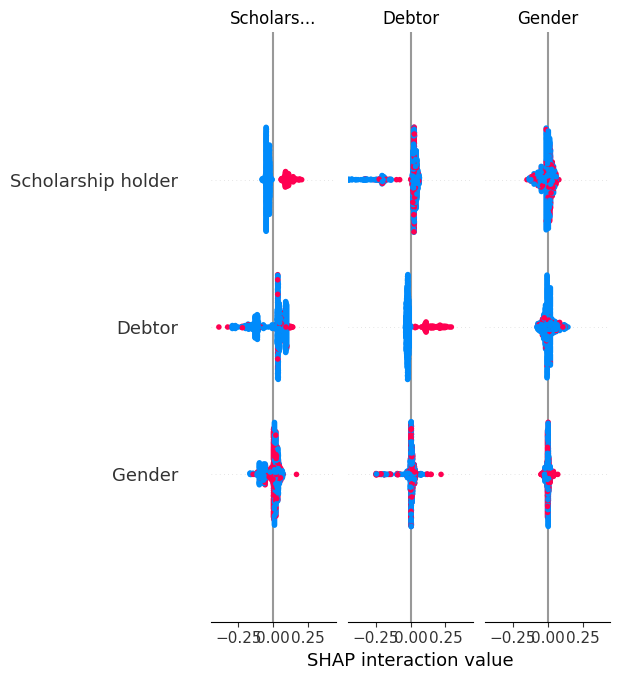

SHAP Explanation for Logistic Regression Optimized


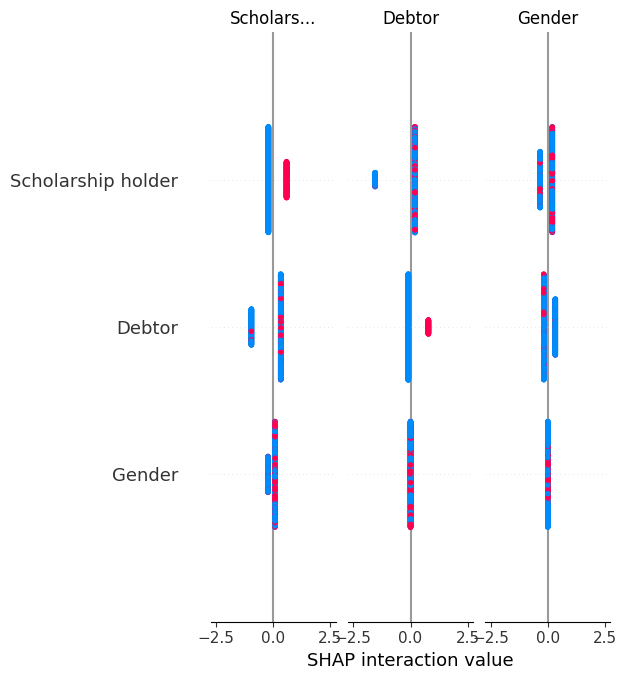

SHAP Explanation for SVM Optimized


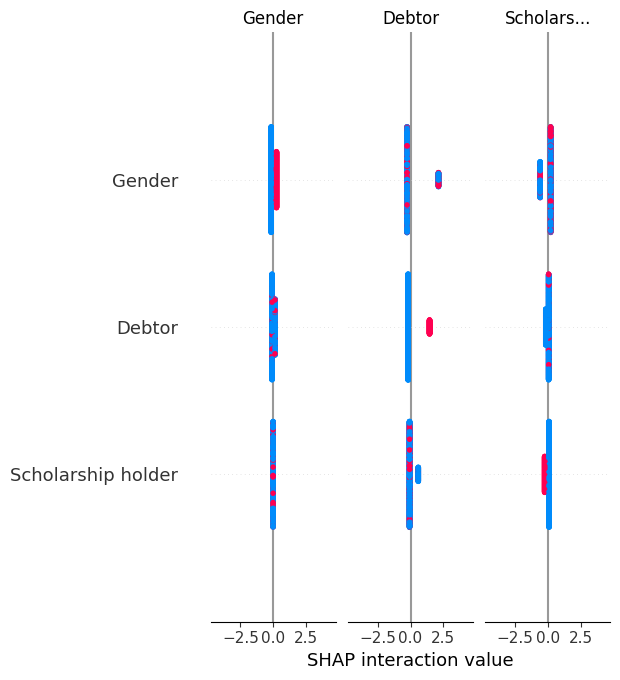

SHAP Explanation for Naïve Bayes Optimized


  0%|          | 0/885 [00:00<?, ?it/s]

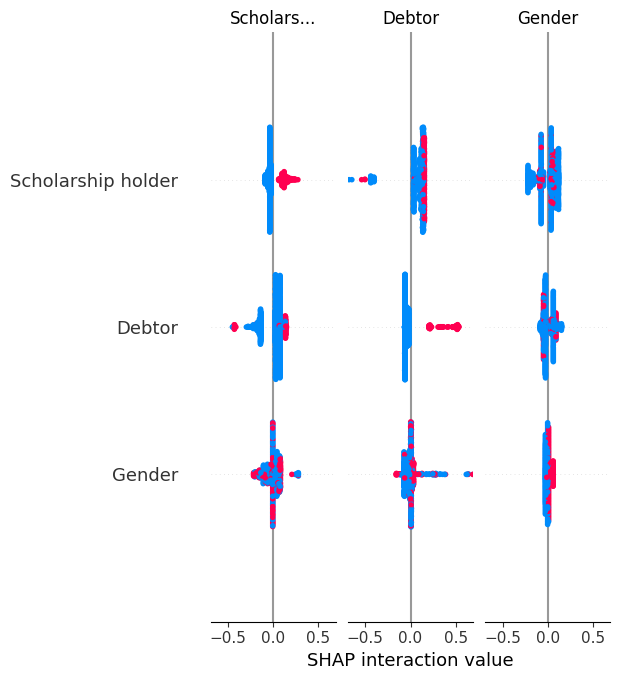

In [10]:
import pandas as pd
import shap
!pip install optuna
import optuna
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

# Load the dataset
df = pd.read_csv("dropout.csv")

# Encode categorical variables (if any)
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target (assuming last column is the target)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Feature Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Ensure X is non-negative after scaling (e.g., using MinMaxScaler)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()  # Or another scaler that guarantees non-negative output
X = scaler.fit_transform(X)

# Feature Selection (Top K best features)
selector = SelectKBest(chi2, k=5)
X_selected = selector.fit_transform(X, y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=318945)

# Function to train, evaluate and return metrics
def train_and_evaluate(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"\nModel: {model_name}")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print("Classification Report:")
    print(report)

    return model

# Baseline Models
rf_baseline = train_and_evaluate(RandomForestClassifier(random_state=318945), "Random Forest Baseline")
log_reg_baseline = train_and_evaluate(LogisticRegression(random_state=318945), "Logistic Regression Baseline")
svm_baseline = train_and_evaluate(SVC(kernel="linear", random_state=318945), "SVM Baseline")
nb_baseline = train_and_evaluate(GaussianNB(), "Naïve Bayes Baseline")

# Hyperparameter optimization with Optuna
def objective(trial):
    model_name = trial.suggest_categorical("model", ["Random Forest", "Logistic Regression", "SVM", "Naïve Bayes"])
    if model_name == "Random Forest":
        model = RandomForestClassifier(
            n_estimators=trial.suggest_int("n_estimators", 10, 200),
            max_depth=trial.suggest_int("max_depth", 3, 20),
            random_state=318945
        )
    elif model_name == "Logistic Regression":
        model = LogisticRegression(
            C=trial.suggest_loguniform("C", 1e-3, 1e3),
            max_iter=1000,
            random_state=318945
        )
    elif model_name == "SVM":
        model = SVC(
            C=trial.suggest_loguniform("C", 1e-3, 1e3),
            kernel="linear",
            random_state=318945
        )
    else:
        model = GaussianNB(var_smoothing=trial.suggest_loguniform("var_smoothing", 1e-9, 1e-1))

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return f1_score(y_test, y_pred, average="weighted")

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)
print("Best parameters:", study.best_params)

# Optimized Models
rf_optimized = RandomForestClassifier(n_estimators=study.best_params.get("n_estimators", 100), max_depth=study.best_params.get("max_depth", None), random_state=318945)
log_reg_optimized = LogisticRegression(C=study.best_params.get("C", 1.0), max_iter=1000, random_state=318945)
svm_optimized = SVC(C=study.best_params.get("C", 1.0), kernel="linear", random_state=318945)
nb_optimized = GaussianNB(var_smoothing=study.best_params.get("var_smoothing", 1e-9))

# Train and evaluate optimized models
rf_final = train_and_evaluate(rf_optimized, "Random Forest Optimized")
log_reg_final = train_and_evaluate(log_reg_optimized, "Logistic Regression Optimized")
svm_final = train_and_evaluate(svm_optimized, "SVM Optimized")
nb_final = train_and_evaluate(nb_optimized, "Naïve Bayes Optimized")

# SHAP explanation function
def explain_with_shap(model, model_name, background_data):
    print(f"SHAP Explanation for {model_name}")

    # Check if the model is tree-based or linear
    if isinstance(model, (RandomForestClassifier,)): # Add other tree-based models if needed
        explainer = shap.Explainer(model, background_data)
        shap_values = explainer(X_test, check_additivity=False)  # Disable additivity check for tree-based models
    elif isinstance(model, GaussianNB):  # Handle GaussianNB separately using KernelExplainer
        explainer = shap.KernelExplainer(model.predict_proba, background_data)
        shap_values = explainer.shap_values(X_test)
    else:  # For linear models and others where check_additivity is not applicable
        explainer = shap.Explainer(model, background_data)
        shap_values = explainer(X_test) # Remove check_additivity for other models

    # Get feature names from the selector (assuming they are in the same order)
    feature_names = df.columns[selector.get_support(indices=True)]

    # Pass feature_names to summary_plot
    shap.summary_plot(shap_values, X_test, feature_names=feature_names)

# Provide X_train (or a representative subset of X) as background data
explain_with_shap(rf_final, "Random Forest Optimized", X_train)
explain_with_shap(log_reg_final, "Logistic Regression Optimized", X_train)
explain_with_shap(svm_final, "SVM Optimized", X_train)
explain_with_shap(nb_final, "Naïve Bayes Optimized", X_train)

Chi-Square Test for Nationality: chi2=45.857524635690716, p-value=0.24222552059446276
Chi-Square Test for Mother's Occupation: chi2=291.92170471181635, p-value=1.63085860350197e-31
Chi-Square Test for Father's Occupation: chi2=264.4998477174759, p-value=4.51543856251902e-19
Chi-Square Test for Debtor: chi2=259.33321964832965, p-value=4.858552123231672e-57
ANOVA for Student Age: F=154.7120708801331, p-value=1.138848633132498e-65
Chi-Square Test for Mother Education Level: chi2=217.9521305573784, p-value=5.823844464375137e-21
Chi-Square Test for Father Education Level: chi2=225.00078327362846, p-value=3.175006994347662e-19
Chi-Square Test for Living Situation: chi2=57.754195314669914, p-value=2.8763109461402946e-13
Chi-Square Test for Marital Status: chi2=63.43854947026341, p-value=8.054279703889306e-10

Model Evaluation:
Accuracy: 0.47909604519774013
              precision    recall  f1-score   support

           0       0.50      0.47      0.48       316
           1       0.15      

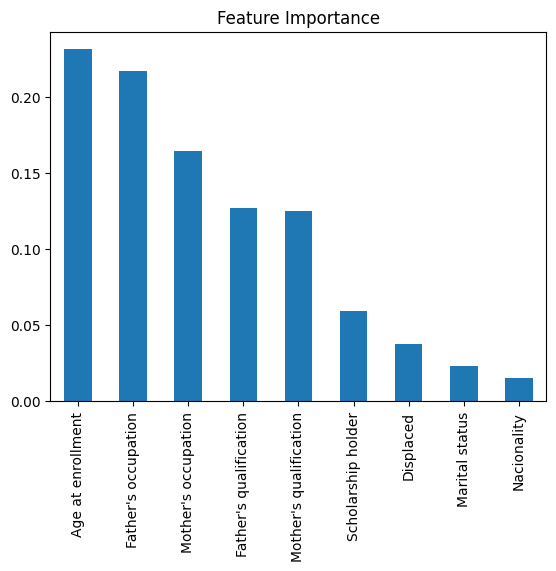

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, f_oneway
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
df = pd.read_csv("dropout.csv")

# Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Investigate impact of Nationality on dropout rates - it's called "Nacionality" in dataset
contingency_table = pd.crosstab(df["Nacionality"], df["Target"])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Test for Nationality: chi2={chi2}, p-value={p}")

# Investigate impact of Mother Occupation on dropout rates
contingency_table = pd.crosstab(df["Mother's occupation"], df["Target"])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Test for Mother's Occupation: chi2={chi2}, p-value={p}")

# Investigate impact of Father Occupation on dropout rates
contingency_table = pd.crosstab(df["Father's occupation"], df["Target"])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Test for Father's Occupation: chi2={chi2}, p-value={p}")

# Investigate impact of Debtor on dropout rates
contingency_table = pd.crosstab(df["Debtor"], df["Target"])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Test for Debtor: chi2={chi2}, p-value={p}")

# Investigate effect of Student Age on dropout using ANOVA
groups = [df[df["Target"] == i]["Age at enrollment"] for i in df["Target"].unique()]
f_stat, p_val = f_oneway(*groups)
print(f"ANOVA for Student Age: F={f_stat}, p-value={p_val}")

# Investigate effect of Mother Education Level on dropout rates
contingency_table = pd.crosstab(df["Mother's qualification"], df["Target"])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Test for Mother Education Level: chi2={chi2}, p-value={p}")

# Investigate effect of Father Education Level on dropout rates
contingency_table = pd.crosstab(df["Father's qualification"], df["Target"])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Test for Father Education Level: chi2={chi2}, p-value={p}")

# Investigate impact of Living Situation on dropout rates
contingency_table = pd.crosstab(df["Displaced"], df["Target"])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Test for Living Situation: chi2={chi2}, p-value={p}")

# Investigate impact of Marital Status on dropout rates
contingency_table = pd.crosstab(df["Marital status"], df["Target"])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Test for Marital Status: chi2={chi2}, p-value={p}")

# Train a new RandomForest model including additional factors
X = df[["Scholarship holder", "Age at enrollment", "Mother's qualification", "Father's qualification", "Nacionality", "Mother's occupation", "Father's occupation", "Displaced", "Marital status"]]  # Corrected column names
y = df["Target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\nModel Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

# Feature Importance Plot
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', title='Feature Importance')
plt.show()

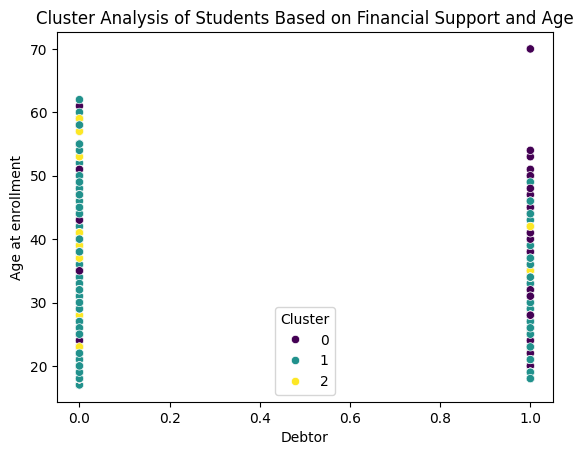


Predictive Model Evaluation:
Accuracy: 0.536723163841808
              precision    recall  f1-score   support

           0       0.58      0.40      0.47       316
           1       0.18      0.07      0.10       151
           2       0.55      0.81      0.66       418

    accuracy                           0.54       885
   macro avg       0.44      0.43      0.41       885
weighted avg       0.50      0.54      0.50       885



In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
!pip install lifelines
from lifelines import KaplanMeierFitter
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
df = pd.read_csv("dropout.csv")

# Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Standardize numerical features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.select_dtypes(include=['int64', 'float64']))

# Cluster Analysis: K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)
sns.scatterplot(x=df['Debtor'], y=df['Age at enrollment'], hue=df['Cluster'], palette='viridis')
plt.title("Cluster Analysis of Students Based on Financial Support and Age")
plt.show()

# Predictive Intervention Modeling using RandomForest
X = df[["Debtor", "Age at enrollment", "Mother's qualification", "Father's qualification"]]
y = df["Target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\nPredictive Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))